In [26]:
data_str = """Gotham City
Bruce (0,1) True True False False
Selina (1,0) True False True False
Joker (1,-1) True True True True
Harley (0,-1) True True True True
Gordon (-1,0) False False False False
Alfred (-1,1) False False False False
Zion
Neo (0,1) True True True True
Morpheus (1,0) True False True False
Trinity (1,-1) False False False False
Niobe (0,-1) True True False False
Tank (-1,0) False False False False
Dozer (-1,1) True True False False
Hogsmeade
Hermione (0,1) True False False False
Luna (1,0) False False False False
Ron (1,-1) True True True True
Harry (0,-1) False False False False
Neville (-1,0) True True True False
Ginny (-1,1) False False False False"""

In [27]:
import pandas as pd
import re

In [28]:
def str_to_bool(value):
    if value.lower() in ['true', '1']:
        return True
    elif value.lower() in ['false', '0']:
        return False
    else:
        raise ValueError(f"Invalid boolean value: {value}")


columns = ["Colony", "ID", "Hex Coordinate", "Shaping", "Box", "Hole", "Stick"]
data = []

# Split data by lines
lines = data_str.splitlines()

# Initialize current colony
current_colony = None

# Process each line
for line in lines:
    if not line.strip():
        continue  # Skip empty lines

    if not any(char.isdigit() for char in line):  # If line is a colony name
        current_colony = line.strip()
    else:  # Otherwise, it's character data
        parts = line.split()
        character_name = parts[0]
        hex_coordinate = parts[1]
        attributes = [str_to_bool(attr) for attr in parts[2:]]
        # Append data to the list
        data.append([current_colony, character_name, hex_coordinate] + attributes)

# Create DataFrame

In [29]:
data_df= pd.DataFrame(data, columns=columns) # Load into df and make columns tinto booleans 
# Corrected function to extract Hex Coordinates
def extract_hex_coordinates(coord_str):
    # Use regex to correctly extract positive and negative numbers
    match = re.match(r'\((-?\d+),\s*(-?\d+)\)', coord_str)
    if match:
        return int(match.group(1)), int(match.group(2))
    else:
        return None, None

# Apply the function to extract Hex_X and Hex_Y and add them to the DataFrame
data_df[['Hex_X', 'Hex_Y']] = data_df['Hex Coordinate'].apply(lambda x: pd.Series(extract_hex_coordinates(x)))

# Display the updated DataFrame
print(data_df)

         Colony        ID Hex Coordinate  Shaping    Box   Hole  Stick  Hex_X  \
0   Gotham City     Bruce          (0,1)     True   True  False  False      0   
1   Gotham City    Selina          (1,0)     True  False   True  False      1   
2   Gotham City     Joker         (1,-1)     True   True   True   True      1   
3   Gotham City    Harley         (0,-1)     True   True   True   True      0   
4   Gotham City    Gordon         (-1,0)    False  False  False  False     -1   
5   Gotham City    Alfred         (-1,1)    False  False  False  False     -1   
6          Zion       Neo          (0,1)     True   True   True   True      0   
7          Zion  Morpheus          (1,0)     True  False   True  False      1   
8          Zion   Trinity         (1,-1)    False  False  False  False      1   
9          Zion     Niobe         (0,-1)     True   True  False  False      0   
10         Zion      Tank         (-1,0)    False  False  False  False     -1   
11         Zion     Dozer   

In [30]:
data_df

,Colony,ID,Hex Coordinate,Shaping,Box,Hole,Stick,Hex_X,Hex_Y
0,Gotham City,Bruce,"(0,1)",True,True,False,False,0,1
1,Gotham City,Selina,"(1,0)",True,False,True,False,1,0
2,Gotham City,Joker,"(1,-1)",True,True,True,True,1,-1
3,Gotham City,Harley,"(0,-1)",True,True,True,True,0,-1
4,Gotham City,Gordon,"(-1,0)",False,False,False,False,-1,0
5,Gotham City,Alfred,"(-1,1)",False,False,False,False,-1,1
6,Zion,Neo,"(0,1)",True,True,True,True,0,1
7,Zion,Morpheus,"(1,0)",True,False,True,False,1,0
8,Zion,Trinity,"(1,-1)",False,False,False,False,1,-1
9,Zion,Niobe,"(0,-1)",True,True,False,False,0,-1


# Plot difference between colonies

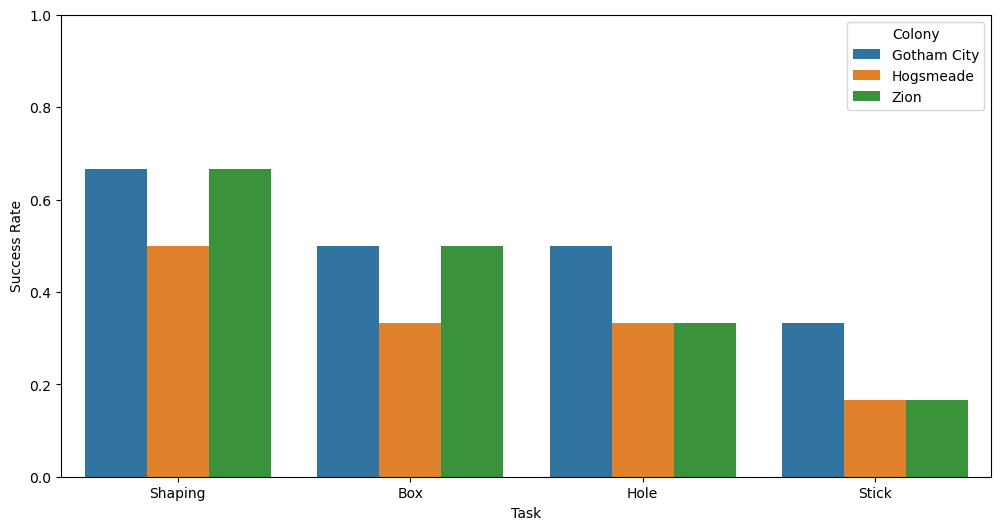

(0.0, 1.0)

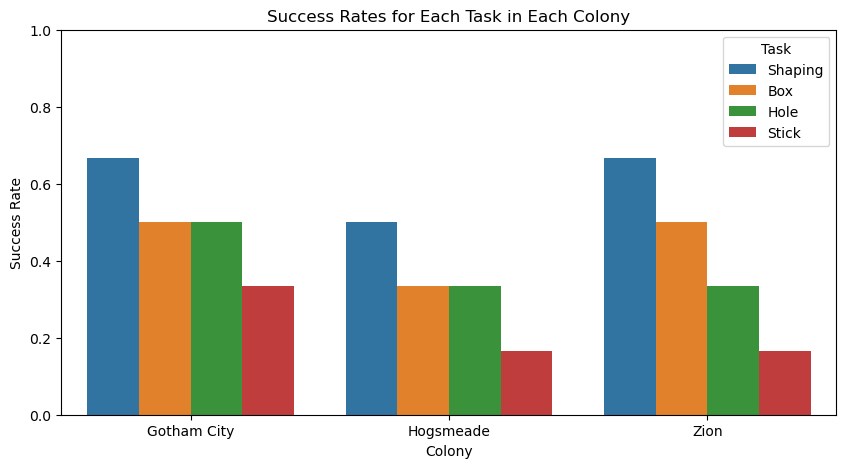

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
task_columns = ['Shaping', 'Box', 'Hole', 'Stick']
success_rates = data_df.groupby('Colony')[task_columns].mean().reset_index()

# Melt the DataFrame to have a suitable format for seaborn
success_rates_melted = success_rates.melt(id_vars='Colony', var_name='Task', value_name='Success Rate')

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Plot success rates for each colony and task
sns.barplot(data=success_rates_melted, x='Task', y='Success Rate', hue='Colony')

# Customize the plot

plt.ylim(0, 1)  # Since success rates are between 0 and 1
plt.ylabel('Success Rate')
plt.xlabel('Task')

# Show the plot
plt.show()

# Optional: Additional plot showing success rate differences between tasks
plt.figure(figsize=(10, 5))
sns.barplot(data=success_rates_melted, x='Colony', y='Success Rate', hue='Task')
# plt.title('Success Rates for Each Task in Each Colony')
plt.ylabel('Success Rate')
plt.xlabel('Colony')
plt.ylim(0, 1)

# Violin Plots

/home/alexmatthews/miniconda3/envs/tadpole_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/alexmatthews/miniconda3/envs/tadpole_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


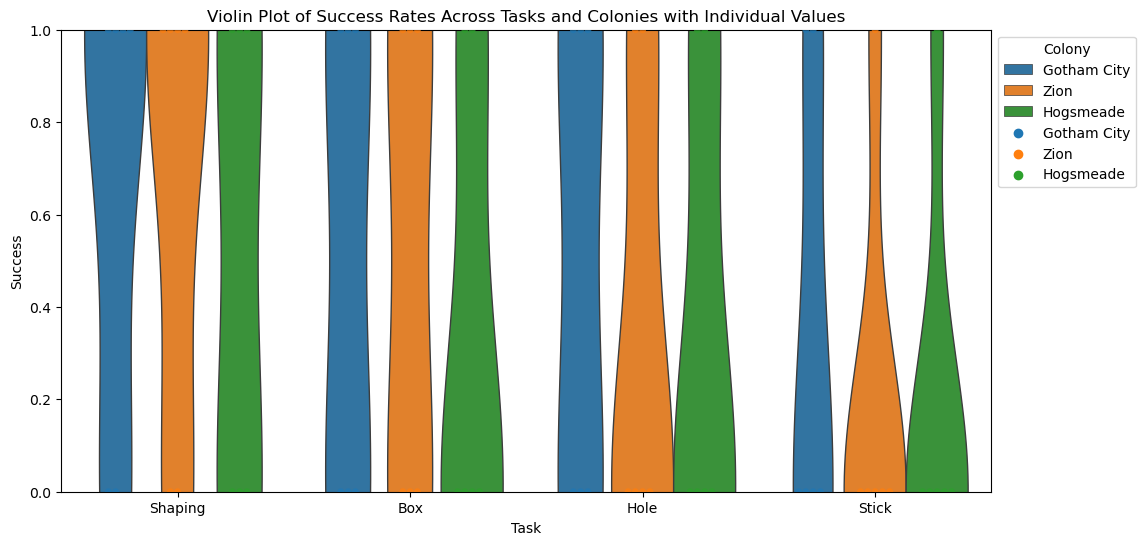

/home/alexmatthews/miniconda3/envs/tadpole_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/alexmatthews/miniconda3/envs/tadpole_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


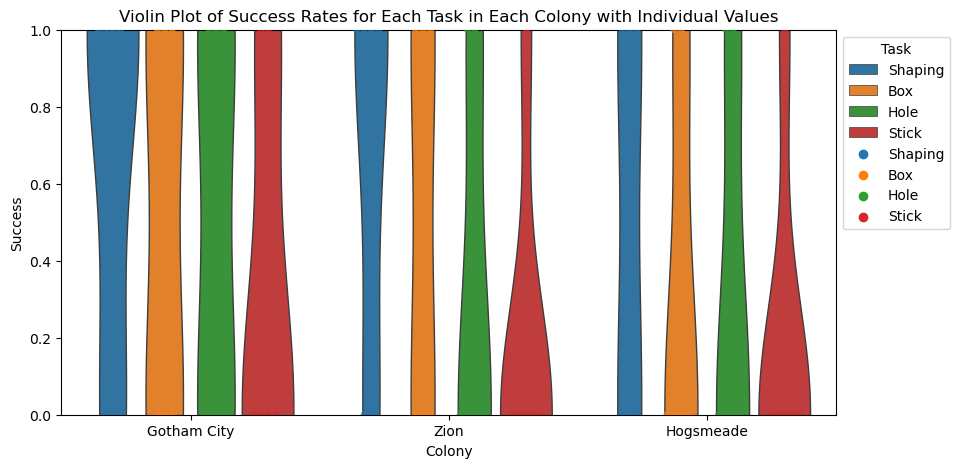

In [32]:
# Convert 'Shaping', 'Box', 'Hole', 'Stick' columns to boolean type
for col in ['Shaping', 'Box', 'Hole', 'Stick']:
    data_df[col] = data_df[col].astype(bool)

# Melt the DataFrame to have a suitable format for seaborn
success_melted = data_df.melt(id_vars=['Colony', 'ID'], value_vars=['Shaping', 'Box', 'Hole', 'Stick'], var_name='Task', value_name='Success')

# Convert 'Success' to numeric for plotting
success_melted['Success'] = success_melted['Success'].astype(int)

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Plot violin plots for each task and colony with individual values
sns.violinplot(data=success_melted, x='Task', y='Success', hue='Colony', dodge=True, inner=None, linewidth=1)

# Add scatter plots on top of violin plots using swarmplot
sns.swarmplot(data=success_melted, x='Task', y='Success', hue='Colony', dodge=True, marker='o', edgecolor='gray', alpha=0.7)

# Customize the plot
plt.title('Violin Plot of Success Rates Across Tasks and Colonies with Individual Values')
plt.ylim(0, 1)  # Success rates are between 0 and 1
plt.ylabel('Success')
plt.xlabel('Task')

# Remove the legend for swarmplot to avoid duplicate legends
plt.legend(title='Colony', loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

# Optional: Additional violin plot for success rates by colony with scatter
plt.figure(figsize=(10, 5))
sns.violinplot(data=success_melted, x='Colony', y='Success', hue='Task', dodge=True, inner=None, linewidth=1)
sns.swarmplot(data=success_melted, x='Colony', y='Success', hue='Task', dodge=True, marker='o', edgecolor='gray', alpha=0.7)

# Customize the plot
plt.title('Violin Plot of Success Rates for Each Task in Each Colony with Individual Values')
plt.ylabel('Success')
plt.xlabel('Colony')
plt.ylim(0, 1)

# Remove the legend for swarmplot to avoid duplicate legends
plt.legend(title='Task', loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

In [42]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Plot violin plots for each task and colony with individual values
sns.violinplot(data=success_melted, x='Task', y='Success', hue='Colony', dodge=True, inner=None, linewidth=1, palette='pastel')

# Add scatter plots on top of violin plots using swarmplot
sns.swarmplot(
    data=success_melted, 
    x='Task', 
    y='Success', 
    hue='Colony', 
    dodge=True, 
    marker='o', 
    palette='dark',  # Use a distinct palette for scatter plot points0	1
1	Gotham City	Selina	(1,0)	True	False	True	False	1	0
2	Gotham City	Joker	(1,-1)	True	True	True	True	1	-1
3	Gotham City	Harley	(0,-1)	True	True	True	True	0	-1
4	Gotham City	Gordon	(-1,0)	False	False	False	False	-1	0
5	Gotham City	Alfred	(-1,1)	False	False	False	False	-1	1
6	Zion	Neo	(0,1)	True	True	True	True	0	1
7	Zion	Morpheus	(1,0)	True	False	True	False	1	0
8	Zion	Trinity	(1,-1)	False	False	False	False	1	-1
9	Zion	Niobe	(0,-1)	True	True	False	False	0	-1
10	Zion	Tank	(-1,0)	False	False	False	False	-1	0
11	Zion	Dozer	(-1,1)	True	True	False	False	-1	1
    alpha=0.8  # Make points more visible
)

# Customize the plot
# plt.title('Violin Plot of Success Rates Across Tasks and Colonies with Individual Values')
plt.ylim(0, 1)  # Success rates are between 0 and 1
plt.ylabel('Success')
plt.xlabel('Task')

# Remove duplicate legends
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Colony', loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

# Optional: Additional violin plot for success rates by colony with scatter
plt.figure(figsize=(10, 5))
sns.violinplot(data=success_melted, x='Colony', y='Success', hue='Task', dodge=True, inner=None, linewidth=1, palette='pastel')
sns.swarmplot(
    data=success_melted, 
    x='Colony', 
    y='Success', 
    hue='Task', 
    dodge=True, 
    marker='o', 
    palette='dark',  # Use a distinct palette for scatter plot points
    size=8,  # Increase the size of points
    edgecolor='black',  # High contrast edge color
    linewidth=0.5,  # Slightly thicker edge lines
    alpha=0.8  # Make points more visible
)

# Customize the plot
# plt.title('Violin Plot of Success Rates for Each Task in Each Colony with Individual Values')
plt.ylabel('Success')
plt.xlabel('Colony')
plt.ylim(0, 1)

# Remove duplicate legends
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Task', loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


SyntaxError: invalid syntax. Perhaps you forgot a comma? (2012219644.py, line 16)

/home/alexmatthews/miniconda3/envs/tadpole_env/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/alexmatthews/miniconda3/envs/tadpole_env/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


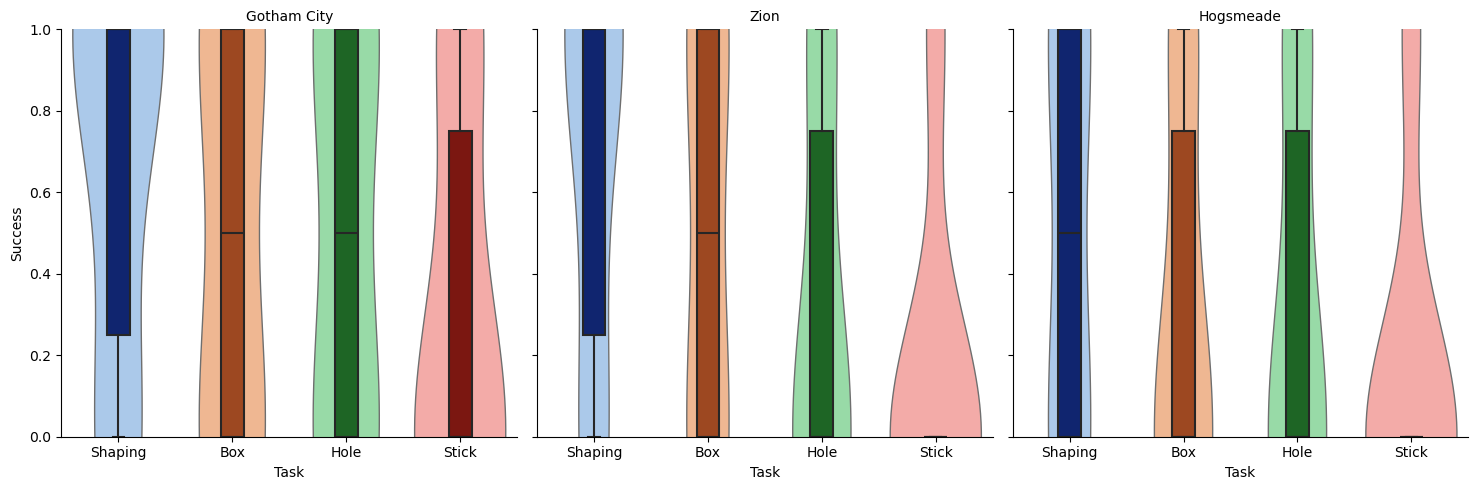

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the FacetGrid for colonies
g = sns.FacetGrid(success_melted, col="Colony", height=5, aspect=1)

# Map a violin plot and box plot onto each facet
g.map(sns.violinplot, 'Task', 'Success', inner=None, palette='pastel', linewidth=1)
g.map(sns.boxplot, 'Task', 'Success', palette='dark', width=0.2, showfliers=False, boxprops={'zorder': 2})

# Customize plot appearance
g.set_axis_labels("Task", "Success")
g.set_titles("{col_name}")
g.set(ylim=(0, 1))

# plt.suptitle('Success Rate Distributions Across Tasks and Colonies', y=1.05)
plt.show()


# lot success vs location

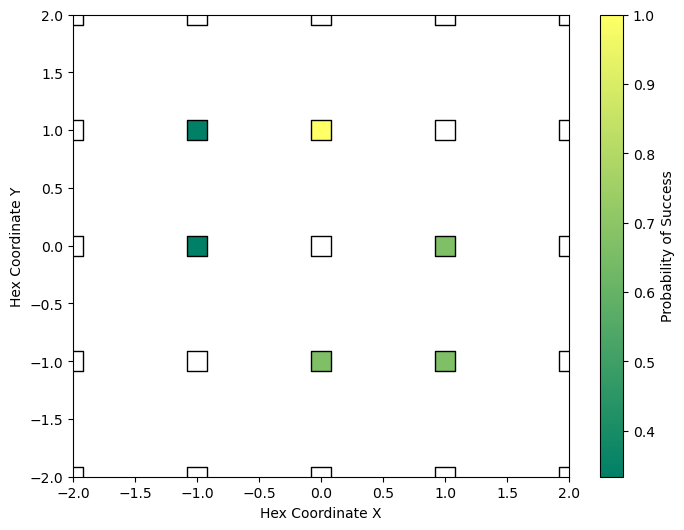

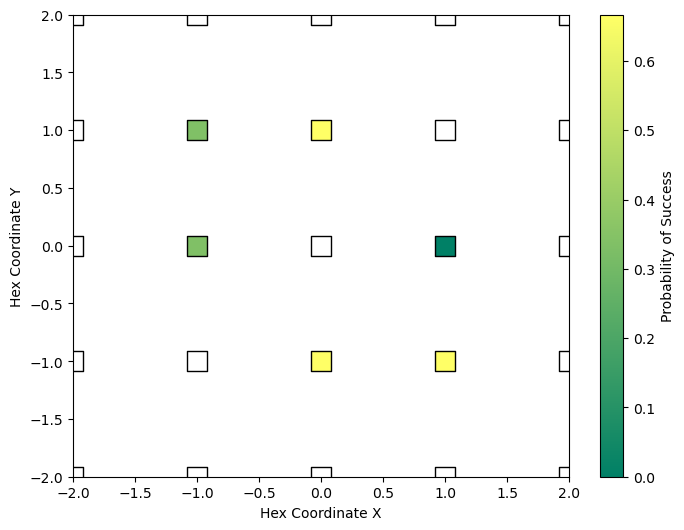

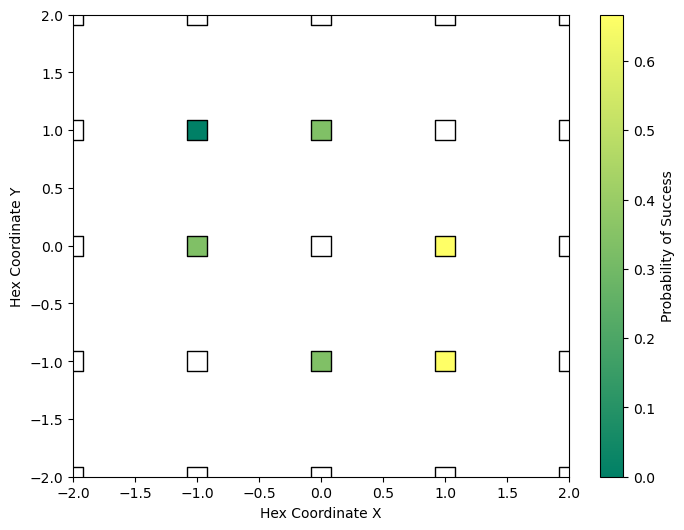

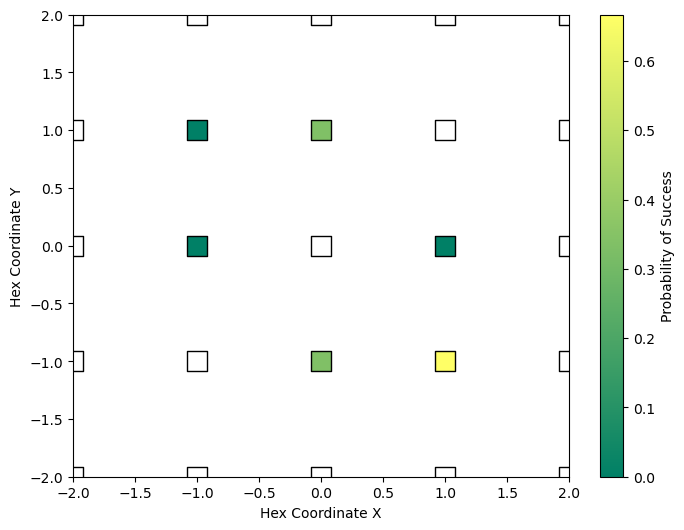

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

# Assuming 'data_df' is already defined and has 'Hex_X' and 'Hex_Y' columns

# List of task columns to plot
task_columns = ["Shaping", "Box", "Hole", "Stick"]

# Function to extract success probability for each location and plot it
def plot_success_probability(data_df, task_column):
    # Calculate the proportion of success for each hex location
    hex_success = data_df.groupby(['Hex_X', 'Hex_Y'])[task_column].mean().reset_index()

    # Extract hex coordinates and success probabilities
    hex_x = hex_success['Hex_X']
    hex_y = hex_success['Hex_Y']
    probabilities = hex_success[task_column]

    # Define plot size
    plt.figure(figsize=(8, 6))

    # Create scatter plot
    scatter = plt.scatter(
        hex_x,
        hex_y,
        c=probabilities,
        cmap='summer',  # Green to yellow colormap
        edgecolor='black',
        s=200,  # Size of the markers
        marker='s'  # Square markers for hex locations
    )

    # Add a color bar to show the probability scale
    cbar = plt.colorbar(scatter)
    cbar.set_label('Probability of Success')

    # Set title and labels
    # plt.title(f'Probability of Success for {task_column} Task')
    plt.xlabel('Hex Coordinate X')
    plt.ylabel('Hex Coordinate Y')

    # Set grid limits
    plt.xlim(hex_x.min() - 1, hex_x.max() + 1)
    plt.ylim(hex_y.min() - 1, hex_y.max() + 1)

    # Highlight missing values as white (no observations)
    for x in range(hex_x.min() - 1, hex_x.max() + 2):
        for y in range(hex_y.min() - 1, hex_y.max() + 2):
            if not ((hex_success['Hex_X'] == x) & (hex_success['Hex_Y'] == y)).any():
                plt.scatter(x, y, color='white', edgecolor='black', s=200, marker='s')

    plt.grid(False)  # Disable grid to make plot clearer
    plt.show()

# Plot success probability for each task
for task in task_columns:
    plot_success_probability(data_df, task)


plot as heatmap 

/tmp/ipykernel_9723/378113378.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('summer')


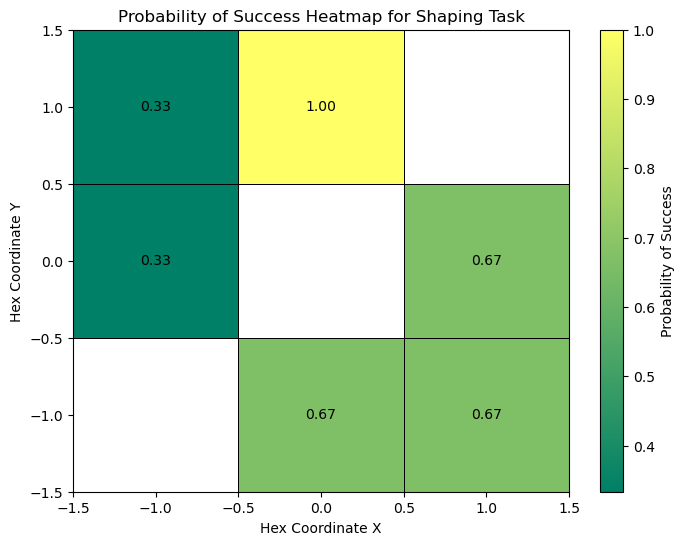

/tmp/ipykernel_9723/378113378.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('summer')


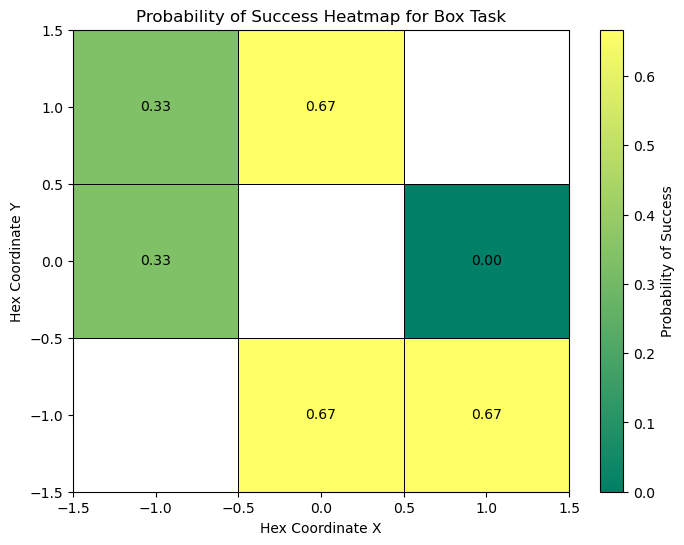

/tmp/ipykernel_9723/378113378.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('summer')


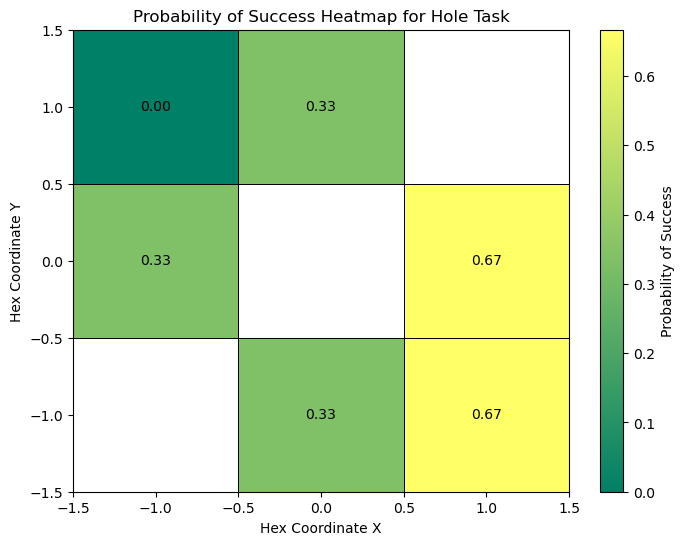

/tmp/ipykernel_9723/378113378.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('summer')


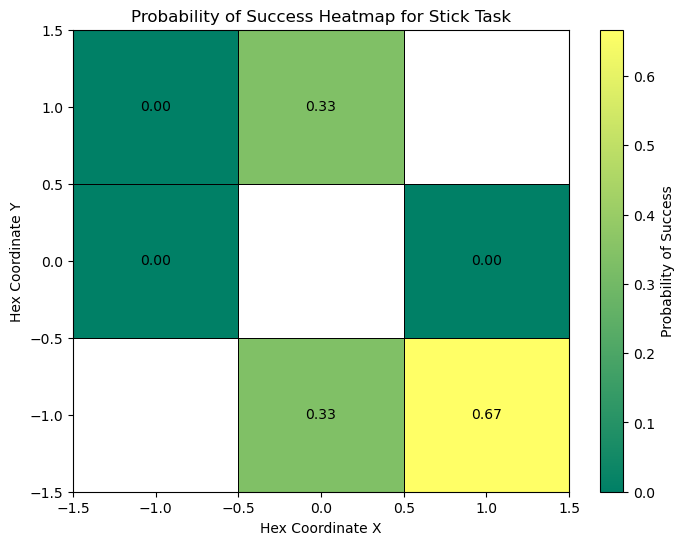

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

# Assuming 'data_df' is already defined and has 'Hex_X' and 'Hex_Y' columns

# List of task columns to plot
task_columns = ["Shaping", "Box", "Hole", "Stick"]

# Function to create a heatmap with annotations for each task
def plot_success_heatmap(data_df, task_column):
    # Calculate the proportion of success for each hex location
    hex_success = data_df.groupby(['Hex_X', 'Hex_Y'])[task_column].mean().reset_index()

    # Get unique hex coordinates to determine the grid size
    unique_x = sorted(hex_success['Hex_X'].unique())
    unique_y = sorted(hex_success['Hex_Y'].unique())

    # Create a 2D array to store success probabilities
    success_grid = np.full((len(unique_y), len(unique_x)), np.nan)  # Initialize with NaNs

    # Fill the 2D array with success probabilities
    for _, row in hex_success.iterrows():
        x_idx = unique_x.index(row['Hex_X'])
        y_idx = unique_y.index(row['Hex_Y'])
        success_grid[y_idx, x_idx] = row[task_column]

    # Create a custom colormap that sets NaNs to white
    cmap = plt.cm.get_cmap('summer')
    cmap.set_bad(color='white')  # Set color for NaNs to white

    # Create a heatmap using pcolormesh
    plt.figure(figsize=(8, 6))
    X, Y = np.meshgrid(unique_x, unique_y)
    heatmap = plt.pcolormesh(X, Y, success_grid, cmap=cmap, shading='auto', edgecolors='k', linewidth=0.5)

    # Add color bar
    cbar = plt.colorbar(heatmap)
    cbar.set_label('Probability of Success')

    # Annotate the heatmap with success probabilities
    for y in range(len(unique_y)):
        for x in range(len(unique_x)):
            if not np.isnan(success_grid[y, x]):  # Only annotate cells with data
                plt.text(unique_x[x], unique_y[y], f'{success_grid[y, x]:.2f}',
                         ha='center', va='center', color='black', fontsize=10)

    # Set title and labels
    plt.title(f'Probability of Success Heatmap for {task_column} Task')
    plt.xlabel('Hex Coordinate X')
    plt.ylabel('Hex Coordinate Y')

    # Show gridlines
    plt.grid(False)

    # Display the heatmap
    plt.show()

# Plot heatmap for each task
for task in task_columns:
    plot_success_heatmap(data_df, task)


# Mae all heatmaps on one 

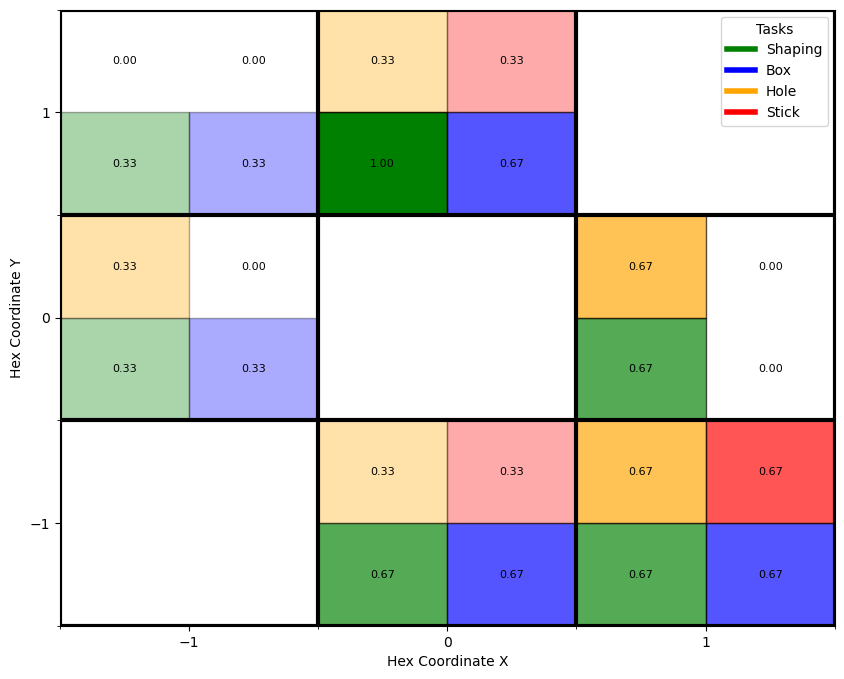

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

# Assuming 'data_df' is already defined and has 'Hex_X' and 'Hex_Y' columns

# List of task columns to plot
task_columns = ["Shaping", "Box", "Hole", "Stick"]
# Base colors for each task
task_colors = ['green', 'blue', 'orange', 'red']  # Different base colors for each task

# Function to create a combined heatmap with subdivided squares for each task with transparency
def plot_combined_heatmap(data_df, task_columns):
    # Calculate the proportion of success for each hex location for each task
    success_grids = []
    for task_column in task_columns:
        hex_success = data_df.groupby(['Hex_X', 'Hex_Y'])[task_column].mean().reset_index()

        # Get unique hex coordinates to determine the grid size
        unique_x = sorted(hex_success['Hex_X'].unique())
        unique_y = sorted(hex_success['Hex_Y'].unique())

        # Create a 2D array to store success probabilities for each task
        success_grid = np.full((len(unique_y), len(unique_x)), np.nan)  # Initialize with NaNs

        # Fill the 2D array with success probabilities
        for _, row in hex_success.iterrows():
            x_idx = unique_x.index(row['Hex_X'])
            y_idx = unique_y.index(row['Hex_Y'])
            success_grid[y_idx, x_idx] = row[task_column]

        success_grids.append(success_grid)

    # Define a combined plot
    plt.figure(figsize=(10, 8))

    # Create a mesh grid
    X, Y = np.meshgrid(unique_x, unique_y)

    # Loop through each grid cell and create the checkerboard plot
    for y in range(len(unique_y)):
        for x in range(len(unique_x)):
            # Define the starting point for the large cell
            start_x = unique_x[x] - 0.5
            start_y = unique_y[y] - 0.5

            # Subdivide each large cell into 4 smaller squares
            for i, task_grid in enumerate(success_grids):
                if not np.isnan(task_grid[y, x]):  # Only plot cells with data
                    # Define the position for each small square
                    offset_x = start_x + (i % 2) * 0.5
                    offset_y = start_y + (i // 2) * 0.5

                    # Adjust transparency based on the success probability
                    alpha = task_grid[y, x]  # Use probability as transparency

                    # Plot the smaller square with the corresponding color and transparency
                    plt.gca().add_patch(plt.Rectangle((offset_x, offset_y), 0.5, 0.5, 
                                                      facecolor=task_colors[i],
                                                      edgecolor='black', alpha=alpha))

                    # Annotate the smaller square
                    plt.text(offset_x + 0.25, offset_y + 0.25, f'{task_grid[y, x]:.2f}', 
                             ha='center', va='center', fontsize=8, color='black')

    # Set plot limits
    plt.xlim(min(unique_x) - 0.5, max(unique_x) + 0.5)
    plt.ylim(min(unique_y) - 0.5, max(unique_y) + 0.5)

    # Set ticks for whole numbers only
    plt.xticks(ticks=np.arange(min(unique_x), max(unique_x) + 1, 1))
    plt.yticks(ticks=np.arange(min(unique_y), max(unique_y) + 1, 1))

    # Draw thick black grid lines at half-integer positions
    plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(0.5))
    plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(0.5))
    plt.grid(visible=True, which='minor', color='black', linestyle='-', linewidth=3)

    # Remove grid lines for whole integers
    plt.grid(visible=False, which='major')

    # Set title and labels
    # plt.title('Combined Probability of Success Heatmap for All Tasks')
    plt.xlabel('Hex Coordinate X')
    plt.ylabel('Hex Coordinate Y')

    # Create a legend for the colors
    handles = [plt.Line2D([0], [0], color=color, lw=4, label=task) 
               for color, task in zip(task_colors, task_columns)]
    plt.legend(handles=handles, title='Tasks')

    # Display the combined heatmap
    plt.show()

# Plot the combined heatmap
plot_combined_heatmap(data_df, task_columns)


# Average Perf Across Tasks

In [ ]:
data_df

,Colony,ID,Hex Coordinate,Shaping,Box,Hole,Stick,Hex_X,Hex_Y,Average Performance
0,Gotham City,Bruce,"(0,1)",True,True,False,False,0,1,0.50
1,Gotham City,Selina,"(1,0)",True,False,True,False,1,0,0.50
2,Gotham City,Joker,"(1,-1)",True,True,True,True,1,-1,1.00
3,Gotham City,Harley,"(0,-1)",True,True,True,True,0,-1,1.00
4,Gotham City,Gordon,"(-1,0)",False,False,False,False,-1,0,0.00
5,Gotham City,Alfred,"(-1,1)",False,False,False,False,-1,1,0.00
6,Zion,Neo,"(0,1)",True,True,True,True,0,1,1.00
7,Zion,Morpheus,"(1,0)",True,False,True,False,1,0,0.50
8,Zion,Trinity,"(1,-1)",False,False,False,False,1,-1,0.00
9,Zion,Niobe,"(0,-1)",True,True,False,False,0,-1,0.50


/tmp/ipykernel_9723/338032911.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')  # 'viridis' is a good colormap for accessibility


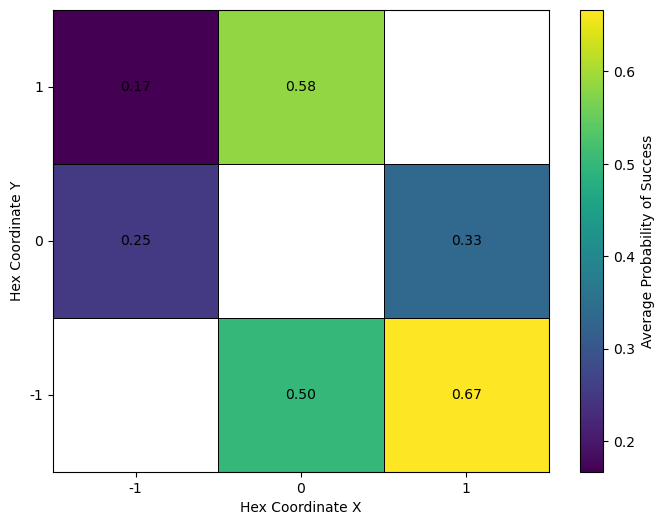

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

# Assuming 'data_df' is already defined and has 'Hex_X' and 'Hex_Y' columns

# List of task columns to calculate the average probability
task_columns = ["Shaping", "Box", "Hole", "Stick"]

# Function to create a heatmap with annotations for the average success across tasks
def plot_average_success_heatmap(data_df, task_columns):
    # Check if the DataFrame is empty
    if data_df.empty:
        print("The input DataFrame is empty. Please provide valid data.")
        return

    # Calculate the average proportion of success across tasks for each hex location
    hex_success = data_df.groupby(['Hex_X', 'Hex_Y'])[task_columns].mean().mean(axis=1).reset_index(name='Average_Success')

    # Check if there is any data to plot
    if hex_success.empty:
        print("No data available after grouping. Check the input data.")
        return

    # Get unique hex coordinates to determine the grid size
    unique_x = sorted(hex_success['Hex_X'].unique())
    unique_y = sorted(hex_success['Hex_Y'].unique())

    # Create a 2D array to store average success probabilities
    success_grid = np.full((len(unique_y), len(unique_x)), np.nan)  # Initialize with NaNs

    # Fill the 2D array with average success probabilities
    for _, row in hex_success.iterrows():
        x_idx = unique_x.index(row['Hex_X'])
        y_idx = unique_y.index(row['Hex_Y'])
        success_grid[y_idx, x_idx] = row['Average_Success']

    # Check if the success grid has data
    if success_grid.size == 0:
        print("The success grid is empty. Nothing to plot.")
        return

    # Use a better colormap for visibility
    cmap = plt.cm.get_cmap('viridis')  # 'viridis' is a good colormap for accessibility
    cmap.set_bad(color='white')  # Set color for NaNs to white

    # Create a heatmap using pcolormesh
    plt.figure(figsize=(8, 6))
    X, Y = np.meshgrid(unique_x, unique_y)
    
    if success_grid.shape != (len(unique_y), len(unique_x)):
        print("Mismatch between grid shape and unique coordinates. Check data dimensions.")
        return
    
    heatmap = plt.pcolormesh(X, Y, success_grid, cmap=cmap, shading='auto', edgecolors='k', linewidth=0.5)

    # Add color bar
    cbar = plt.colorbar(heatmap)
    cbar.set_label('Average Probability of Success')

    # Annotate the heatmap with success probabilities
    for y in range(len(unique_y)):
        for x in range(len(unique_x)):
            if not np.isnan(success_grid[y, x]):  # Only annotate cells with data
                plt.text(unique_x[x], unique_y[y], f'{success_grid[y, x]:.2f}',
                         ha='center', va='center', color='black', fontsize=10)

    # Set title and labels
    # plt.title('Average Probability of Success Heatmap Across All Tasks')
    plt.xlabel('Hex Coordinate X')
    plt.ylabel('Hex Coordinate Y')

    # Set x-ticks and y-ticks to show only integer values
    plt.xticks(ticks=np.arange(min(unique_x), max(unique_x) + 1, 1), labels=np.arange(min(unique_x), max(unique_x) + 1, 1))
    plt.yticks(ticks=np.arange(min(unique_y), max(unique_y) + 1, 1), labels=np.arange(min(unique_y), max(unique_y) + 1, 1))

    # Show gridlines
    plt.grid(False)

    # Display the heatmap
    plt.show()

# Plot heatmap for the average success across all tasks
plot_average_success_heatmap(data_df, task_columns)


/tmp/ipykernel_9723/338032911.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')  # 'viridis' is a good colormap for accessibility


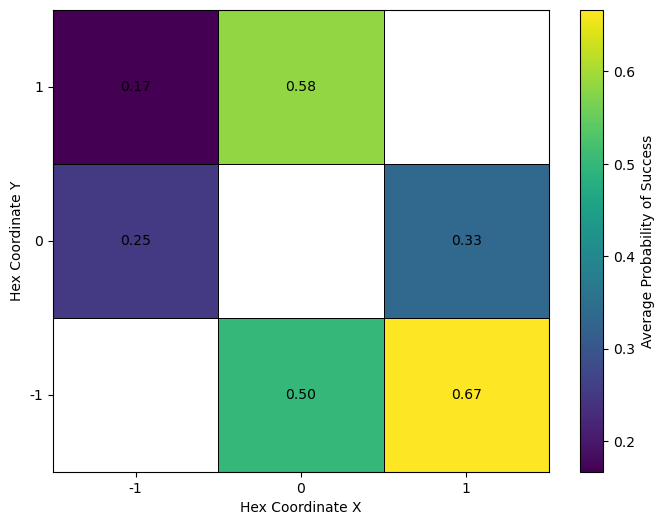

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

# Assuming 'data_df' is already defined and has 'Hex_X' and 'Hex_Y' columns

# List of task columns to calculate the average probability
task_columns = ["Shaping", "Box", "Hole", "Stick"]

# Function to create a heatmap with annotations for the average success across tasks
def plot_average_success_heatmap(data_df, task_columns):
    # Check if the DataFrame is empty
    if data_df.empty:
        print("The input DataFrame is empty. Please provide valid data.")
        return

    # Calculate the average proportion of success across tasks for each hex location
    hex_success = data_df.groupby(['Hex_X', 'Hex_Y'])[task_columns].mean().mean(axis=1).reset_index(name='Average_Success')

    # Check if there is any data to plot
    if hex_success.empty:
        print("No data available after grouping. Check the input data.")
        return

    # Get unique hex coordinates to determine the grid size
    unique_x = sorted(hex_success['Hex_X'].unique())
    unique_y = sorted(hex_success['Hex_Y'].unique())

    # Create a 2D array to store average success probabilities
    success_grid = np.full((len(unique_y), len(unique_x)), np.nan)  # Initialize with NaNs

    # Fill the 2D array with average success probabilities
    for _, row in hex_success.iterrows():
        x_idx = unique_x.index(row['Hex_X'])
        y_idx = unique_y.index(row['Hex_Y'])
        success_grid[y_idx, x_idx] = row['Average_Success']

    # Check if the success grid has data
    if success_grid.size == 0:
        print("The success grid is empty. Nothing to plot.")
        return

    # Use a better colormap for visibility
    cmap = plt.cm.get_cmap('viridis')  # 'viridis' is a good colormap for accessibility
    cmap.set_bad(color='white')  # Set color for NaNs to white

    # Create a heatmap using pcolormesh
    plt.figure(figsize=(8, 6))
    X, Y = np.meshgrid(unique_x, unique_y)
    
    if success_grid.shape != (len(unique_y), len(unique_x)):
        print("Mismatch between grid shape and unique coordinates. Check data dimensions.")
        return
    
    heatmap = plt.pcolormesh(X, Y, success_grid, cmap=cmap, shading='auto', edgecolors='k', linewidth=0.5)

    # Add color bar
    cbar = plt.colorbar(heatmap)
    cbar.set_label('Average Probability of Success')

    # Annotate the heatmap with success probabilities
    for y in range(len(unique_y)):
        for x in range(len(unique_x)):
            if not np.isnan(success_grid[y, x]):  # Only annotate cells with data
                plt.text(unique_x[x], unique_y[y], f'{success_grid[y, x]:.2f}',
                         ha='center', va='center', color='black', fontsize=10)

    # Set title and labels
    # plt.title('Average Probability of Success Heatmap Across All Tasks')
    plt.xlabel('Hex Coordinate X')
    plt.ylabel('Hex Coordinate Y')

    # Set x-ticks and y-ticks to show only integer values
    plt.xticks(ticks=np.arange(min(unique_x), max(unique_x) + 1, 1), labels=np.arange(min(unique_x), max(unique_x) + 1, 1))
    plt.yticks(ticks=np.arange(min(unique_y), max(unique_y) + 1, 1), labels=np.arange(min(unique_y), max(unique_y) + 1, 1))

    # Show gridlines
    plt.grid(False)

    # Display the heatmap
    plt.show()

# Plot heatmap for the average success across all tasks
plot_average_success_heatmap(data_df, task_columns)


# Shaping excluded

/tmp/ipykernel_9723/3660227342.py:48: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')  # 'viridis' is a good colormap for accessibility


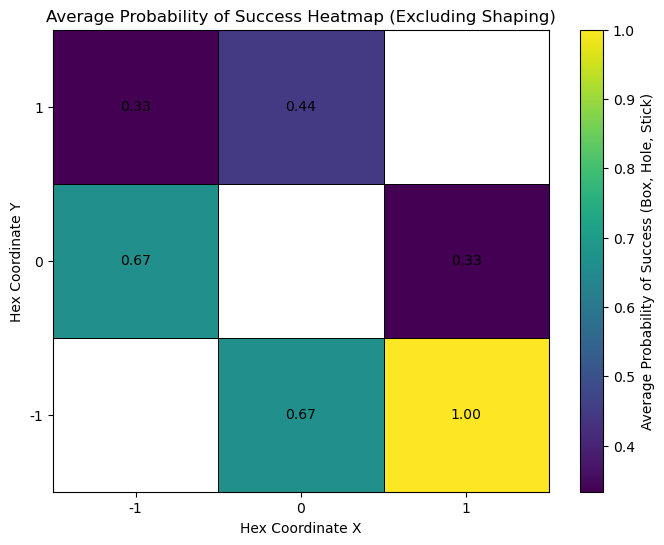

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

# Assuming 'data_df' is already defined and has 'Hex_X' and 'Hex_Y' columns

# List of task columns to calculate the average probability, excluding "Shaping"
task_columns = ["Box", "Hole", "Stick"]

# Function to create a heatmap with annotations for the average success across tasks, excluding rows where "Shaping" is False
def plot_average_success_heatmap_excluding_shaping(data_df, task_columns):
    # Exclude rows where the "Shaping" column is False
    filtered_data_df = data_df[data_df["Shaping"] != False]

    # Check if the filtered DataFrame is empty
    if filtered_data_df.empty:
        print("The filtered DataFrame is empty. No data to plot.")
        return

    # Calculate the average proportion of success across tasks for each hex location
    hex_success = filtered_data_df.groupby(['Hex_X', 'Hex_Y'])[task_columns].mean().mean(axis=1).reset_index(name='Average_Success')

    # Check if there is any data to plot
    if hex_success.empty:
        print("No data available after grouping. Check the input data.")
        return

    # Get unique hex coordinates to determine the grid size
    unique_x = sorted(hex_success['Hex_X'].unique())
    unique_y = sorted(hex_success['Hex_Y'].unique())

    # Create a 2D array to store average success probabilities
    success_grid = np.full((len(unique_y), len(unique_x)), np.nan)  # Initialize with NaNs

    # Fill the 2D array with average success probabilities
    for _, row in hex_success.iterrows():
        x_idx = unique_x.index(row['Hex_X'])
        y_idx = unique_y.index(row['Hex_Y'])
        success_grid[y_idx, x_idx] = row['Average_Success']

    # Check if the success grid has data
    if success_grid.size == 0:
        print("The success grid is empty. Nothing to plot.")
        return

    # Use a better colormap for visibility
    cmap = plt.cm.get_cmap('viridis')  # 'viridis' is a good colormap for accessibility
    cmap.set_bad(color='white')  # Set color for NaNs to white

    # Create a heatmap using pcolormesh
    plt.figure(figsize=(8, 6))
    X, Y = np.meshgrid(unique_x, unique_y)
    
    if success_grid.shape != (len(unique_y), len(unique_x)):
        print("Mismatch between grid shape and unique coordinates. Check data dimensions.")
        return
    
    heatmap = plt.pcolormesh(X, Y, success_grid, cmap=cmap, shading='auto', edgecolors='k', linewidth=0.5)

    # Add color bar
    cbar = plt.colorbar(heatmap)
    cbar.set_label('Average Probability of Success (Box, Hole, Stick)')

    # Annotate the heatmap with success probabilities
    for y in range(len(unique_y)):
        for x in range(len(unique_x)):
            if not np.isnan(success_grid[y, x]):  # Only annotate cells with data
                plt.text(unique_x[x], unique_y[y], f'{success_grid[y, x]:.2f}',
                         ha='center', va='center', color='black', fontsize=10)

    # Set title and labels
    # plt.title('Average Probability of Success Heatmap (Excluding Shaping)')
    plt.xlabel('Hex Coordinate X')
    plt.ylabel('Hex Coordinate Y')

    # Set x-ticks and y-ticks to show only integer values
    plt.xticks(ticks=np.arange(min(unique_x), max(unique_x) + 1, 1), labels=np.arange(min(unique_x), max(unique_x) + 1, 1))
    plt.yticks(ticks=np.arange(min(unique_y), max(unique_y) + 1, 1), labels=np.arange(min(unique_y), max(unique_y) + 1, 1))

    # Show gridlines
    plt.grid(False)

    # Display the heatmap
    plt.show()

# Plot heatmap for the average success across tasks (excluding "Shaping")
plot_average_success_heatmap_excluding_shaping(data_df, task_columns)
